In [1]:
# Code that tracks volume changes of H2B cells over time

In [96]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from aicsimageio import AICSImage

%matplotlib inline

In [3]:
# load in csv data
h2b_csv = pd.read_csv('hipsc_h2b_scene_0_results.csv')
h2b_csv.head()

,CellId,structure_name,full_zstack,crop_raw,crop_seg,name_dict,roi,scale_micron,node_id,T_index,...,out_list,track_id,lineage_id,label_img,is_outlier,has_outlier,past_outlier,normal_migration,parent,daughter
0,45dd8d07-c99f-4579-9778-eec7b018ca7c,hipsc_h2b_scene_0,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,"{'crop_raw': ['structure'], 'crop_seg': ['stru...","[42, 100, 1505, 1682, 1691, 1836]","[0.135, 0.135, 0.135]",0.0,0.0,...,[365],0.0,0.0,1.0,False,False,False,True,False,False
1,717115e3-1327-4144-aeb7-deb918ad3cbc,hipsc_h2b_scene_0,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,"{'crop_raw': ['structure'], 'crop_seg': ['stru...","[42, 96, 1581, 1735, 1885, 2031]","[0.135, 0.135, 0.135]",1.0,0.0,...,[426],1.0,1.0,2.0,False,False,False,True,False,False
2,acbb3c00-e607-441e-b2bd-b4026ed16ccb,hipsc_h2b_scene_0,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,"{'crop_raw': ['structure'], 'crop_seg': ['stru...","[42, 94, 1684, 1805, 1588, 1787]","[0.135, 0.135, 0.135]",2.0,0.0,...,[366],2.0,2.0,3.0,False,False,False,True,False,False
3,8a019ea2-711c-4949-8865-567531e10abf,hipsc_h2b_scene_0,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,"{'crop_raw': ['structure'], 'crop_seg': ['stru...","[42, 96, 1817, 1970, 2206, 2312]","[0.135, 0.135, 0.135]",3.0,0.0,...,[367],3.0,3.0,4.0,False,False,False,True,False,False
4,fc093417-6445-4d09-8644-48efcefd5ba5,hipsc_h2b_scene_0,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,"{'crop_raw': ['structure'], 'crop_seg': ['stru...","[39, 100, 1917, 2075, 2077, 2213]","[0.135, 0.135, 0.135]",4.0,0.0,...,[364],4.0,4.0,5.0,False,False,False,True,False,False


In [4]:
# look at columns
list(h2b_csv.columns)

['CellId',
 'structure_name',
 'full_zstack',
 'crop_raw',
 'crop_seg',
 'name_dict',
 'roi',
 'scale_micron',
 'node_id',
 'T_index',
 'centroid_x',
 'centroid_y',
 'centroid_z',
 'index_sequence',
 'path_tif',
 'volume',
 'in_list',
 'out_list',
 'track_id',
 'lineage_id',
 'label_img',
 'is_outlier',
 'has_outlier',
 'past_outlier',
 'normal_migration',
 'parent',
 'daughter']

c:\users\sandra.oluoch\.conda\envs\test_segmenter\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='is_outlier', ylabel='count'>

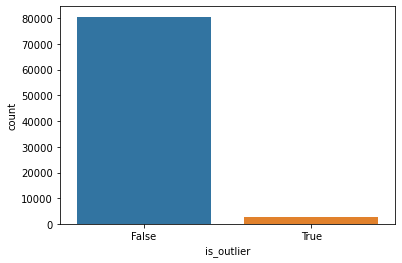

In [5]:
# check for current outliers
sns.countplot(h2b_csv['is_outlier'])

c:\users\sandra.oluoch\.conda\envs\test_segmenter\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='has_outlier', ylabel='count'>

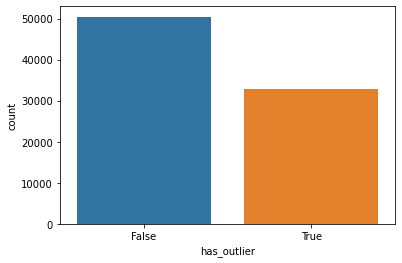

In [6]:
# check for past outliers
sns.countplot(h2b_csv['has_outlier'])

c:\users\sandra.oluoch\.conda\envs\test_segmenter\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='past_outlier', ylabel='count'>

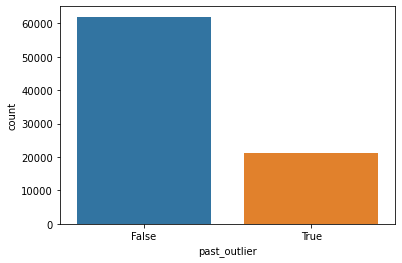

In [7]:
# check for past outliers
sns.countplot(h2b_csv['past_outlier'])

c:\users\sandra.oluoch\.conda\envs\test_segmenter\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='normal_migration', ylabel='count'>

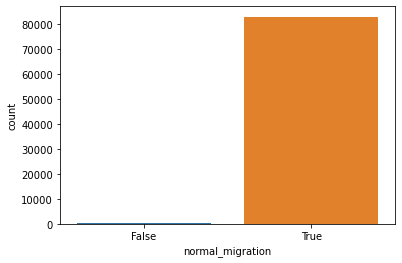

In [8]:
# check for any abnormal migrations
sns.countplot(h2b_csv['normal_migration'])

c:\users\sandra.oluoch\.conda\envs\test_segmenter\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='parent', ylabel='count'>

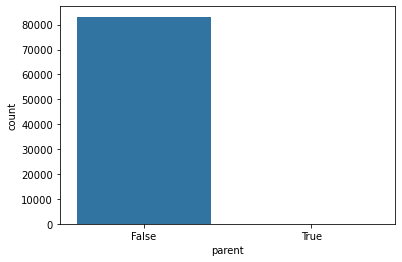

In [9]:
# check for any parent cells
sns.countplot(h2b_csv['parent'])

c:\users\sandra.oluoch\.conda\envs\test_segmenter\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='daughter', ylabel='count'>

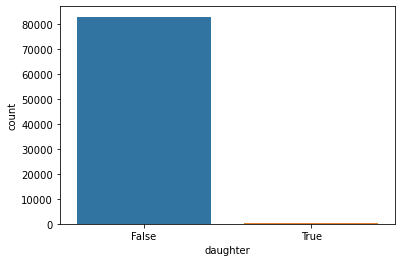

In [10]:
# check for any daughter cells
sns.countplot(h2b_csv['daughter'])

c:\users\sandra.oluoch\.conda\envs\test_segmenter\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='volume', ylabel='Density'>

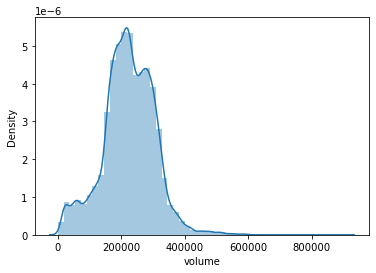

In [11]:
# look at volume distribution. NOTE: normalize and get rid of any NaN values later
sns.distplot(h2b_csv['volume'])

In [12]:
h2b_csv.shape

(83277, 27)

In [13]:
# the number of unique cells
h2b_csv['track_id'].nunique()

1197

In [14]:
h2b_csv['CellId'].nunique()

83277

In [15]:
# reset index of csv dataframe
h2b_reset = h2b_csv.reset_index()

In [17]:
h2b_reset.columns

Index(['index', 'CellId', 'structure_name', 'full_zstack', 'crop_raw',
       'crop_seg', 'name_dict', 'roi', 'scale_micron', 'node_id', 'T_index',
       'centroid_x', 'centroid_y', 'centroid_z', 'index_sequence', 'path_tif',
       'volume', 'in_list', 'out_list', 'track_id', 'lineage_id', 'label_img',
       'is_outlier', 'has_outlier', 'past_outlier', 'normal_migration',
       'parent', 'daughter'],
      dtype='object')

In [124]:
h2b_reset[['index_sequence','track_id','volume']]

,index_sequence,track_id,volume
0,0.0,0.0,246501.0
1,0.0,1.0,238205.0
2,0.0,2.0,208156.0
3,0.0,3.0,177531.0
4,0.0,4.0,255336.0
...,...,...,...
83272,221.0,1191.0,15645.0
83273,221.0,1167.0,28879.0
83274,221.0,1178.0,19338.0
83275,221.0,1161.0,48106.0


In [19]:
# create a dataframe that only has volume data for cell with track_id = 68.0
h2b_68 = h2b_csv[(h2b_csv['track_id'] == 68)]

<AxesSubplot:xlabel='index_sequence', ylabel='volume'>

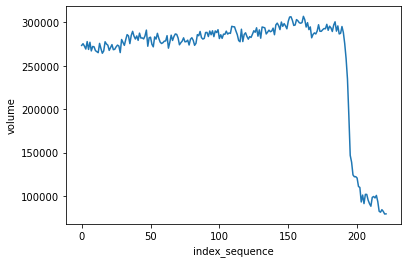

In [20]:
# plot index sequence vs volume
sns.lineplot(x='index_sequence', y='volume', data=h2b_68)

In [22]:
# CURRENT GOAL
# create a for loop that plots index_sequence vs. volume for each unique track ID
# STEP 1: create a dataframe that only includes one track id with its corresponding volume data
# STEP 2: use the dataframe to plot index sequence vs volume
# theoretically this for loop should create 1197 tables and plots for each unique track ID (1197 unique track ID's)

# use a dictionary??
# create a dictionary that stores all volume values for each track_id

In [23]:
h2b_csv.head()

,CellId,structure_name,full_zstack,crop_raw,crop_seg,name_dict,roi,scale_micron,node_id,T_index,...,out_list,track_id,lineage_id,label_img,is_outlier,has_outlier,past_outlier,normal_migration,parent,daughter
0,45dd8d07-c99f-4579-9778-eec7b018ca7c,hipsc_h2b_scene_0,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,"{'crop_raw': ['structure'], 'crop_seg': ['stru...","[42, 100, 1505, 1682, 1691, 1836]","[0.135, 0.135, 0.135]",0.0,0.0,...,[365],0.0,0.0,1.0,False,False,False,True,False,False
1,717115e3-1327-4144-aeb7-deb918ad3cbc,hipsc_h2b_scene_0,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,"{'crop_raw': ['structure'], 'crop_seg': ['stru...","[42, 96, 1581, 1735, 1885, 2031]","[0.135, 0.135, 0.135]",1.0,0.0,...,[426],1.0,1.0,2.0,False,False,False,True,False,False
2,acbb3c00-e607-441e-b2bd-b4026ed16ccb,hipsc_h2b_scene_0,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,"{'crop_raw': ['structure'], 'crop_seg': ['stru...","[42, 94, 1684, 1805, 1588, 1787]","[0.135, 0.135, 0.135]",2.0,0.0,...,[366],2.0,2.0,3.0,False,False,False,True,False,False
3,8a019ea2-711c-4949-8865-567531e10abf,hipsc_h2b_scene_0,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,"{'crop_raw': ['structure'], 'crop_seg': ['stru...","[42, 96, 1817, 1970, 2206, 2312]","[0.135, 0.135, 0.135]",3.0,0.0,...,[367],3.0,3.0,4.0,False,False,False,True,False,False
4,fc093417-6445-4d09-8644-48efcefd5ba5,hipsc_h2b_scene_0,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,"{'crop_raw': ['structure'], 'crop_seg': ['stru...","[39, 100, 1917, 2075, 2077, 2213]","[0.135, 0.135, 0.135]",4.0,0.0,...,[364],4.0,4.0,5.0,False,False,False,True,False,False


In [25]:
list(h2b_csv.columns)

['CellId',
 'structure_name',
 'full_zstack',
 'crop_raw',
 'crop_seg',
 'name_dict',
 'roi',
 'scale_micron',
 'node_id',
 'T_index',
 'centroid_x',
 'centroid_y',
 'centroid_z',
 'index_sequence',
 'path_tif',
 'volume',
 'in_list',
 'out_list',
 'track_id',
 'lineage_id',
 'label_img',
 'is_outlier',
 'has_outlier',
 'past_outlier',
 'normal_migration',
 'parent',
 'daughter']

In [29]:
h2b_csv[['label_img']]

,label_img
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
...,...
83272,405.0
83273,407.0
83274,415.0
83275,421.0


In [33]:
# drop all non-numeric columns
h2b_data = h2b_csv.drop(['CellId','structure_name','CellId','full_zstack','crop_raw','crop_seg','name_dict',
                         'roi','scale_micron','node_id','path_tif','in_list','out_list', 'is_outlier','has_outlier',
                         'past_outlier','normal_migration','parent','daughter'],axis=1)
h2b_data.head()

,T_index,centroid_x,centroid_y,centroid_z,index_sequence,volume,track_id,lineage_id,label_img
0,0.0,2202.534598,1992.881858,30.876861,0.0,246501.0,0.0,0.0,1.0
1,0.0,2449.294654,2074.699062,30.599681,0.0,238205.0,1.0,1.0,2.0
2,0.0,2103.751821,2172.091244,30.419474,0.0,208156.0,2.0,2.0,3.0
3,0.0,2821.659338,2363.591204,30.594251,0.0,177531.0,3.0,3.0,4.0
4,0.0,2678.155188,2495.649082,30.718806,0.0,255336.0,4.0,4.0,5.0


In [34]:
# convert T_index and track_id to integers:
h2b_data = h2b_data.astype({'T_index': int, 'track_id': int})

In [36]:
h2b_data.shape

(83277, 9)

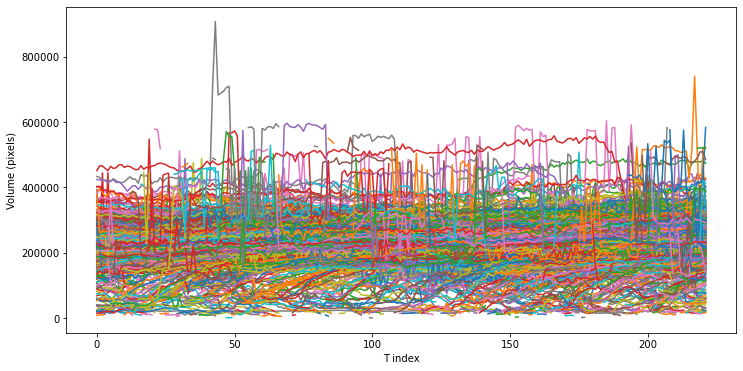

In [95]:
# for loop that plots volume change of cells
fig, ax = plt.subplots(1,1, figsize=(12,6))
for track, df_track in h2b_data.groupby(['track_id']):
    ax.plot(df_track.T_index, df_track.volume)
ax.set_xlabel('T index')
ax.set_ylabel('Volume (pixels)')
plt.show()
 

In [44]:
# create dataframe with certain cells
tracks = [812,  858,  655,  346, 1096,  167,  228,  251]
df_sampled = h2b_data.loc[h2b_data.track_id.isin(tracks)]
df_sampled.head()

,T_index,centroid_x,centroid_y,centroid_z,index_sequence,volume,track_id,lineage_id,label_img
163,0,3673.658504,1411.901299,33.635020,0.0,246290.0,167,163.0,164.0
218,0,3919.920162,485.061897,34.534412,0.0,280933.0,228,218.0,219.0
239,0,1285.287789,1193.905267,35.332675,0.0,252129.0,251,239.0,240.0
320,0,2545.440693,1768.313087,34.643394,0.0,317886.0,346,320.0,321.0
520,1,3672.613452,1415.747351,33.616078,1.0,251270.0,167,163.0,158.0


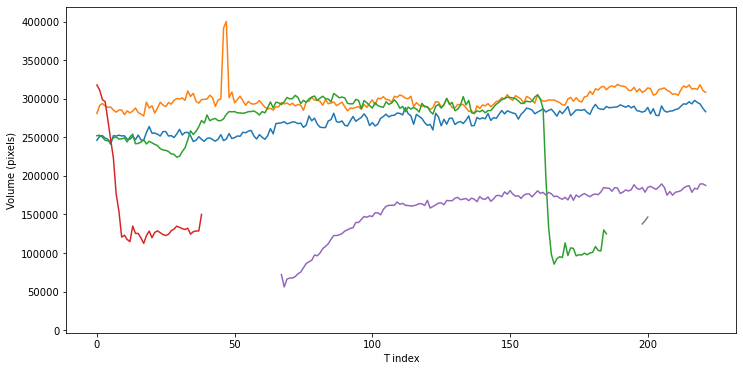

In [46]:
# plotting volumes of certain cells
fig, ax = plt.subplots(1,1, figsize=(12,6))
for track, df_track in df_sampled.groupby('track_id'):
    ax.plot(df_track.T_index, df_track.volume)
ax.set_xlabel('T index')
ax.set_ylabel('Volume (pixels)')
plt.show()

In [97]:
# find a way to determine % of true/false labels for outliers are true for cell tracks.

In [100]:
# pull out track 228
track228 = h2b_csv.loc[h2b_csv.track_id==228]
track228.shape

(222, 27)

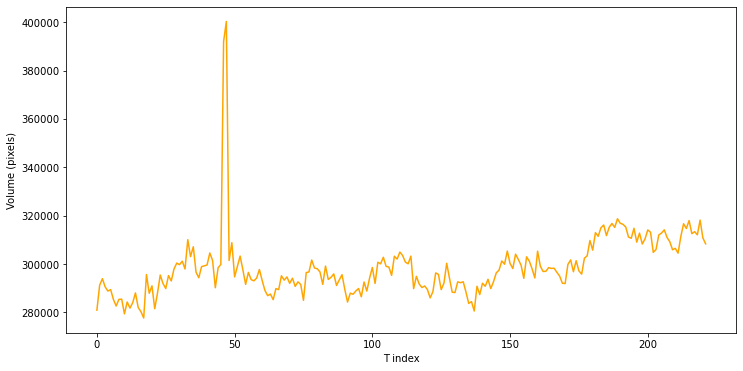

In [102]:
# plotting volume of track 228
fig, ax = plt.subplots(1,1, figsize=(12,6))
for track, df_track in track228.groupby('track_id'):
    ax.plot(df_track.T_index, df_track.volume, color='orange')
ax.set_xlabel('T index')
ax.set_ylabel('Volume (pixels)')
plt.show()

In [105]:
# looks like there is a potential segmentation error around 45-50 T index. Pull out the following info:
track228.loc[(track228.T_index>40)&(track228.T_index<50)][['volume', 'T_index', 'crop_seg', 'crop_raw', 'is_outlier']]

,volume,T_index,crop_seg,crop_raw,is_outlier
14973,304587.0,41.0,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,False
15360,301486.0,42.0,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,False
15733,290205.0,43.0,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,False
16026,298421.0,44.0,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,False
16395,299852.0,45.0,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,False
16782,391934.0,46.0,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,True
17161,400267.0,47.0,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,True
17444,301462.0,48.0,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,False
17923,308830.0,49.0,/allen/aics/assay-dev/users/Filip/Data/trackin...,/allen/aics/assay-dev/users/Filip/Data/trackin...,False


In [109]:
# load in and compare the cropped and segmented images of track 228 during these T indexes

for frame in [45,46,47,48]:
    # pull out the cropped and segmented file image pathways 
    raw_path = h2b_csv.loc[h2b_csv.T_index==frame,'crop_raw'].values[0]
    seg_path = h2b_csv.loc[h2b_csv.T_index==frame, 'crop_seg'].values[0]
    print(raw_path, seg_path)
    
    # pull out the images and shape
    raw = AICSImage(raw_path).data.squeeze()
    seg = AICSImage(seg_path).data.squeeze()
    
    #plotting
    fig, axs = plt.subplot((1,2), figsize = (8,4))
    axs[0].imshow(raw.max(axis=0))
    axs[1].imshow(img.raw(axis=0))

/allen/aics/assay-dev/users/Filip/Data/tracking_evaluation/H2B/scene_0_analysis/3767716d-6c03-403f-905f-97a47bd80dc3/raw.tiff /allen/aics/assay-dev/users/Filip/Data/tracking_evaluation/H2B/scene_0_analysis/3767716d-6c03-403f-905f-97a47bd80dc3/seg.tiff


FileNotFoundError: \allen\aics\assay-dev\users\Filip\Data\tracking_evaluation\H2B\scene_0_analysis\3767716d-6c03-403f-905f-97a47bd80dc3\raw.tiff